# Requirements

In [43]:
import matplotlib.pyplot as plt
import random

# Problem

100 prisonors numbered from 1 to 100 get access to a room that contains 100 boxes numbered from 1 to 100.  Each box contains a slip of paper with a number between 1 and 100.  Each of the 100 prisoners can open 50 of the boxes.  If in one of these boxes he finds the slip with his number, he wins, if not, he loses.

The prisoners are led into the room one by one, and they are not allowed to communicate with their peers.  They also have to leave the room behind exactly as they found it.  (So they can not swap slips between boxes, or leave boxes open, mark them, and so on.)

If all prisonors win, they are all released.  If at least one prisoner loses, all prisoners are executed.

The prisoner can discuss strategies before they start.

For convenience, we number everything (prisoners, boxes and the value on the slips) starting from index 0. We can represent the 100 boxes as a random permutation of the the numbers 0 to 99.

In [7]:
boxes = list(range(100))
random.shuffle(boxes)

# Random strategy

The probability that a randomly opened box contains a slip with a given number is 0.01.  It is clear that if each prisoner picks 50 boxes at random, the probability to open the one that contains his number is 0.5.  However, since the prisoners have no way to communicate, each of them opens the boxes independent of all the others, and the probability that they all find the slip with their name on it is $2^{-100}$, so vanishingly small. 

In [34]:
def pick_randomly(prisoner, boxes):
    opened_boxes = random.sample(range(100), k=50)
    return any(map(lambda x: boxes[x] == prisoner, opened_boxes))

In [35]:
pick_randomly(50, boxes)

True

In [50]:
def nr_succesful_prisoners(boxes, strategy):
    nr_successes = 0
    for prisoner in range(100):
        if strategy(prisoner, boxes):
            nr_successes += 1
    return nr_successes

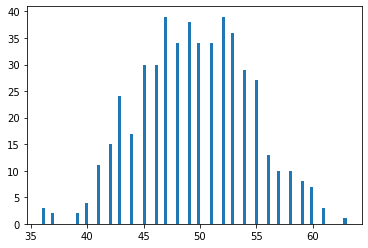

In [61]:
runs = [nr_succesful_prisoners(boxes, pick_randomly) for _ in range(500)]
plt.hist(runs, bins=100);

For 500 independent trials, the maximum number of prisoners that finds his own number is less than 70.

# Smart strategy

Although the prisoners have no means to communicate once they start to open boxes, they can agree on a strategy upfront.  One of them is pretty smart, and he proposes the following:
* open the box that corresponds to your number, so, e.g., prisoner 5 starts by opening the 5th box;
* next, read the slip in that box, and open the box with the number on the slip next,
* repeat until you found your number, or opened the 50th box.

In [72]:
def pick_strategically(prisoner, boxes):
    slip = boxes[prisoner]
    for _ in range(50):
        if slip == prisoner:
            return True
        slip = boxes[slip]
    return False        

In [75]:
pick_strategically(85, boxes)

True

The algorithm itself is now deterministic, so we have to vary the distribution of the slips in the boxes to estimate the probability of success for the 100 prisoners.

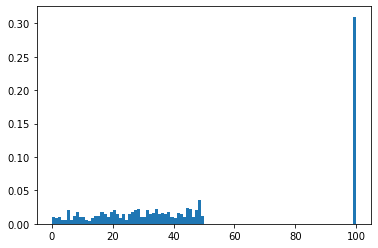

In [78]:
runs = []
for _ in range(500):
    random.shuffle(boxes)
    runs.append(nr_succesful_prisoners(boxes, pick_strategically))
plt.hist(runs, bins=100, density=True);

Using this strategy, the prisoners win their freedom with a probability of more than 0.3.  Note that there is no middle ground.  Either all prisoners find their slip, or more than half don't.

# References

See [Wikipedia](https://en.wikipedia.org/wiki/100_prisoners_problem) for a detailed description.